In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1732,2020-09-23,United Kingdom,401562.0,403551.0,41834.0,41825.0,-1989.0,9.0
1733,2020-09-23,Germany,275044.0,275927.0,9401.0,9409.0,-883.0,-8.0
1734,2020-09-23,Iran,428420.0,429193.0,24687.0,24656.0,-773.0,31.0
1735,2020-09-23,Turkey,305796.0,306302.0,7623.0,7639.0,-506.0,-16.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10780.843408175015
RMSE =  39522.93045527617


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  316.35290731145653
RMSE =  791.609199259541


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  78678.4268292683
RMSE =  124832.37645954108
-- World performances for deaths --
MAE =  1872.0243902439024
RMSE =  2279.377715143474


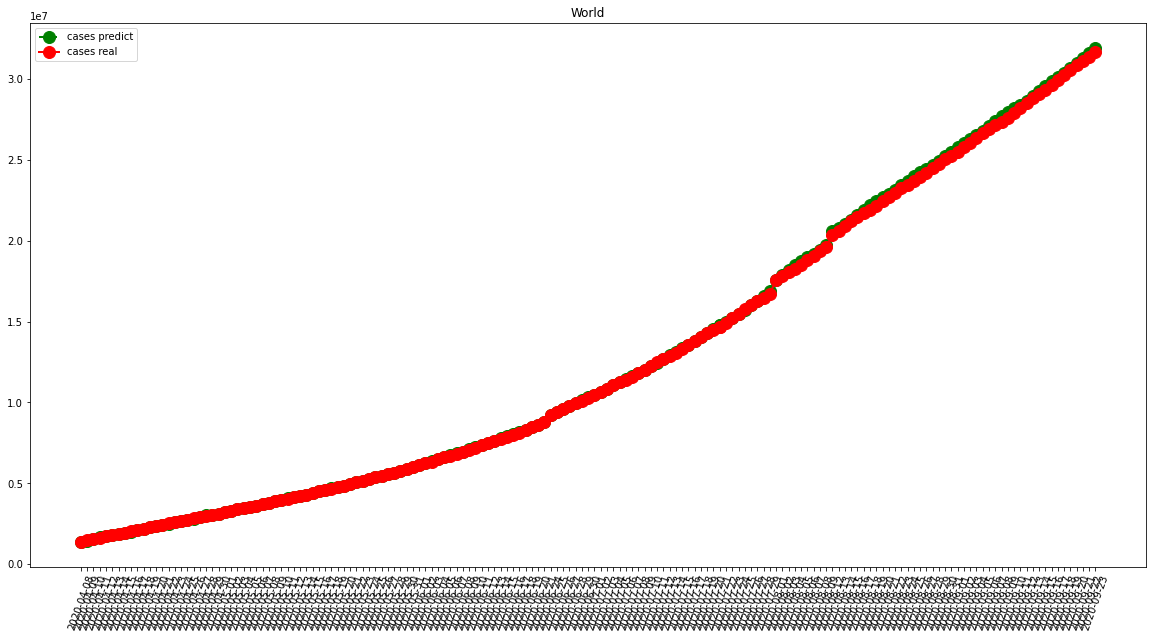

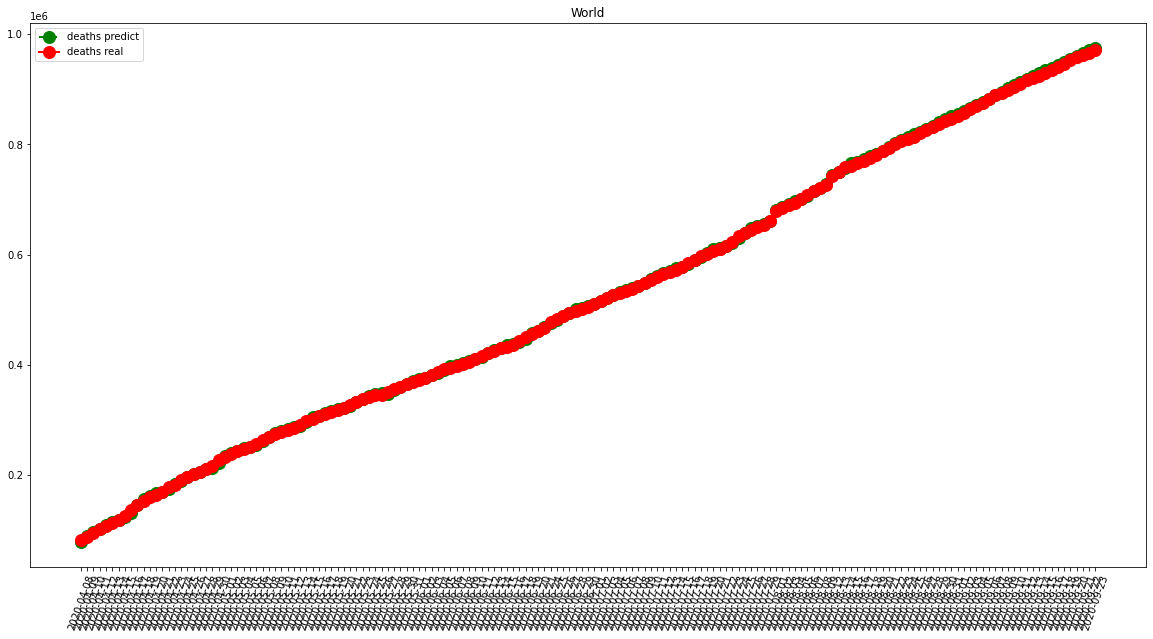

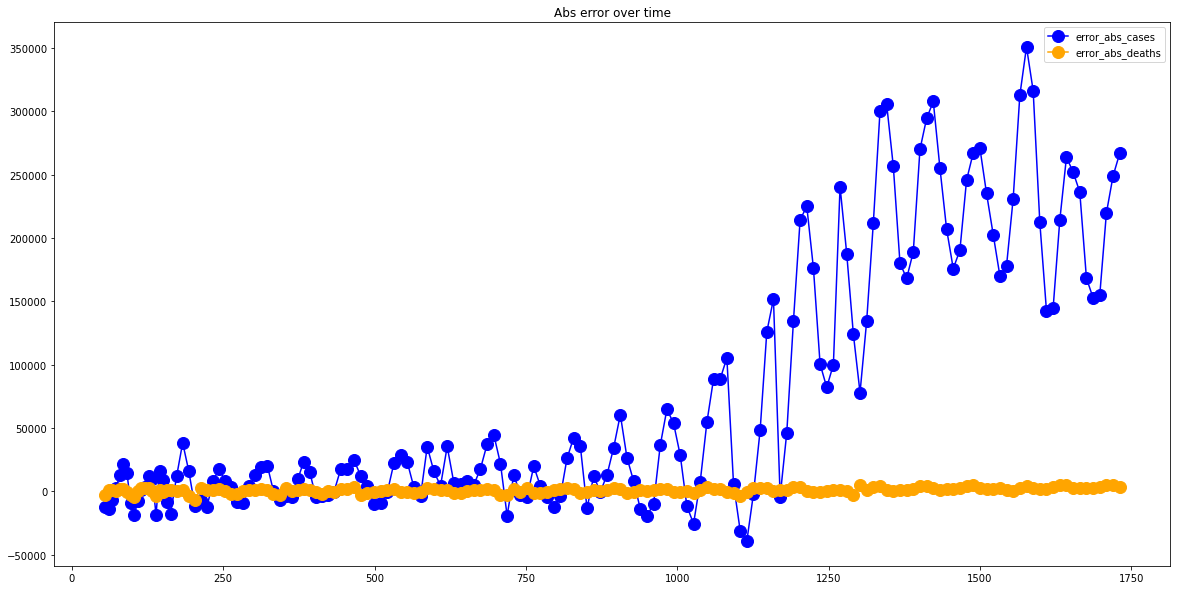

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1192.0344827586207
RMSE =  1794.2405398782319
-- France performances for deaths --
MAE =  111.0919540229885
RMSE =  254.7651837488292


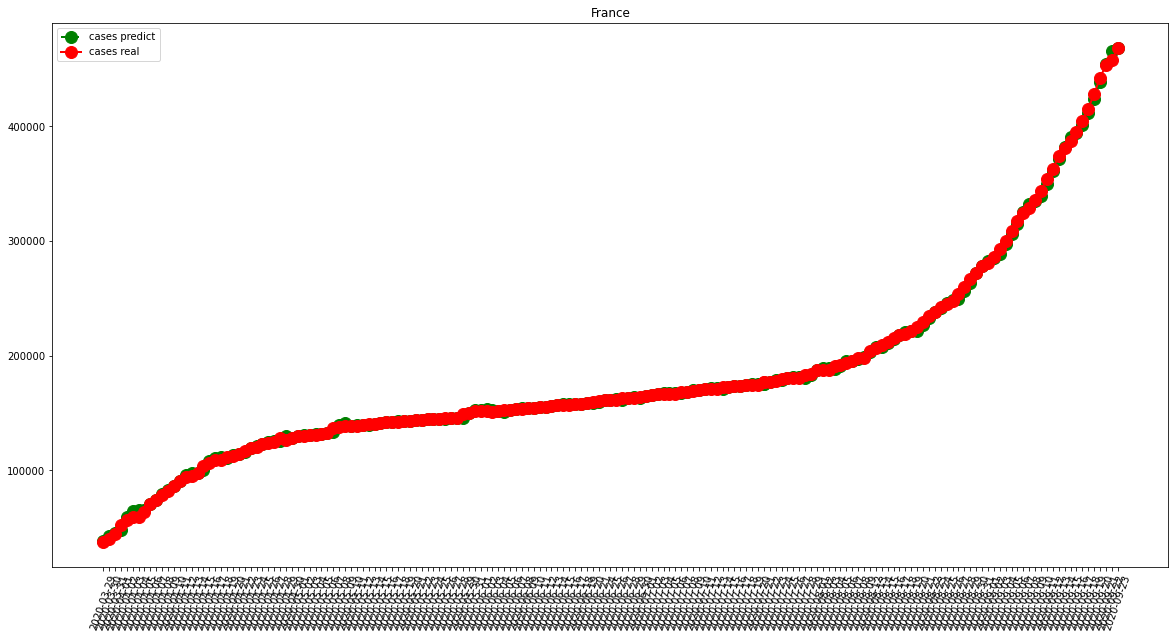

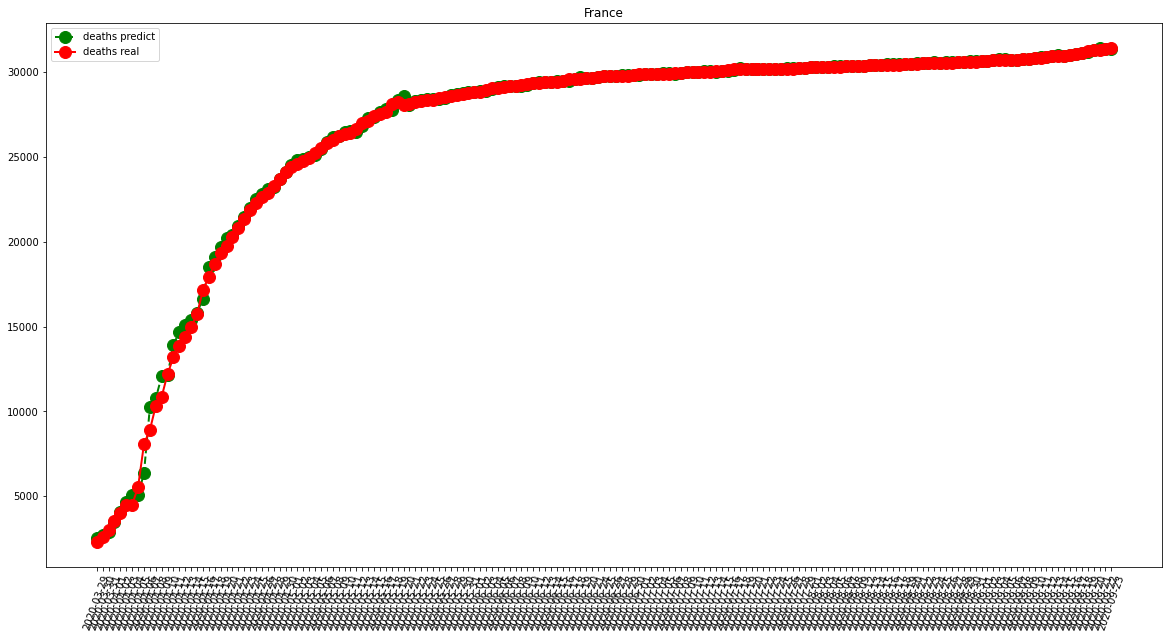

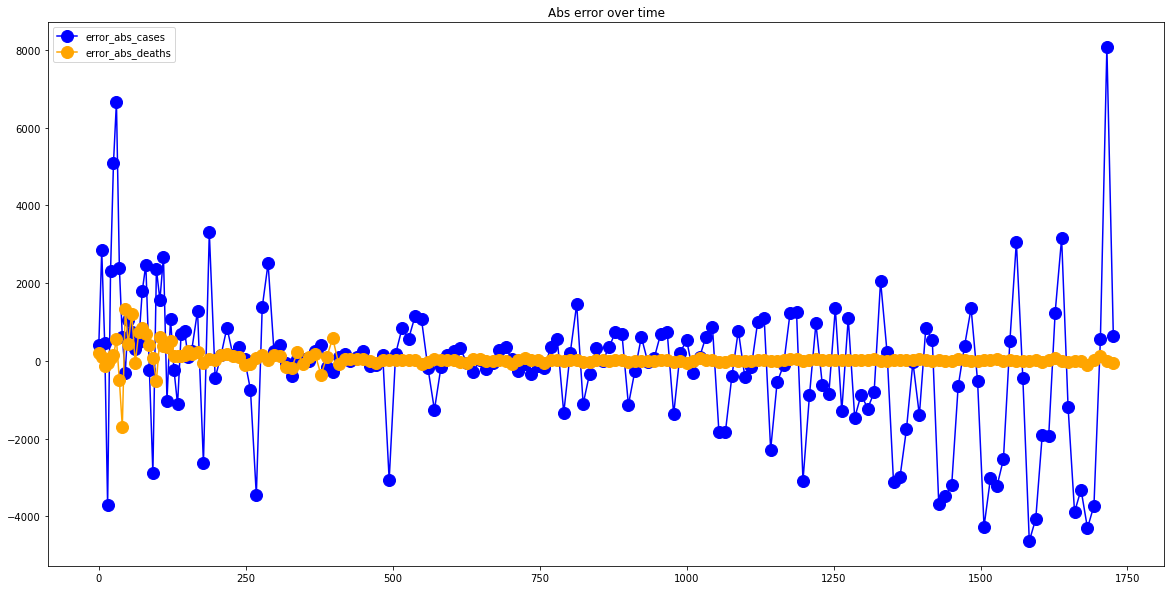

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.13793103448273
RMSE =  444.5839847995313
-- Italy performances for deaths --
MAE =  66.13793103448276
RMSE =  225.12456322115816


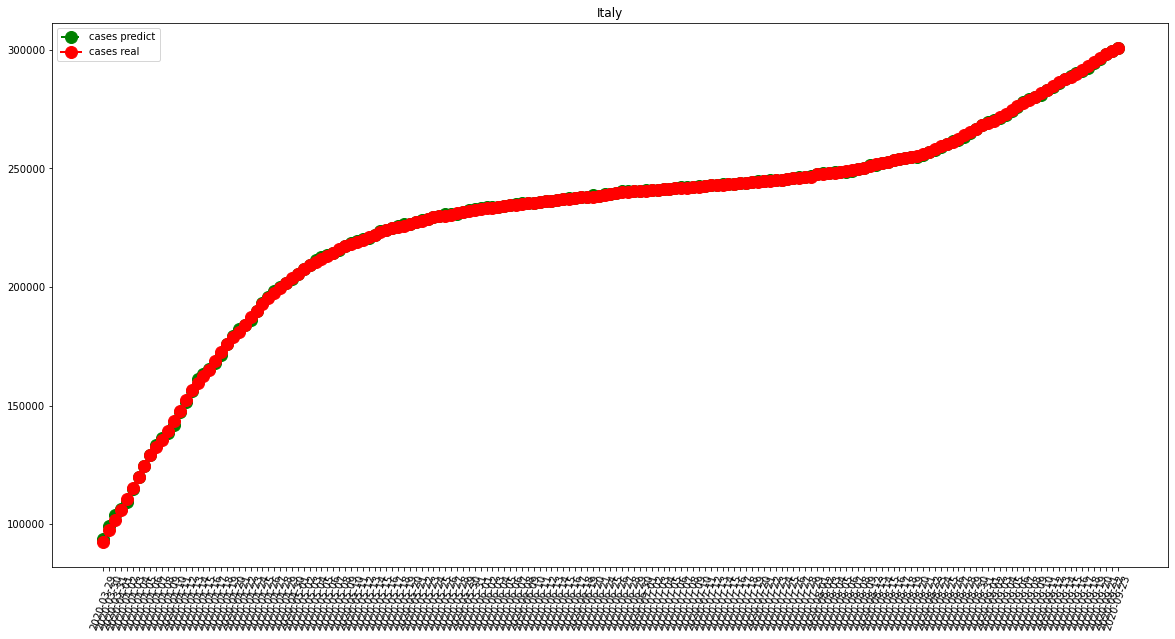

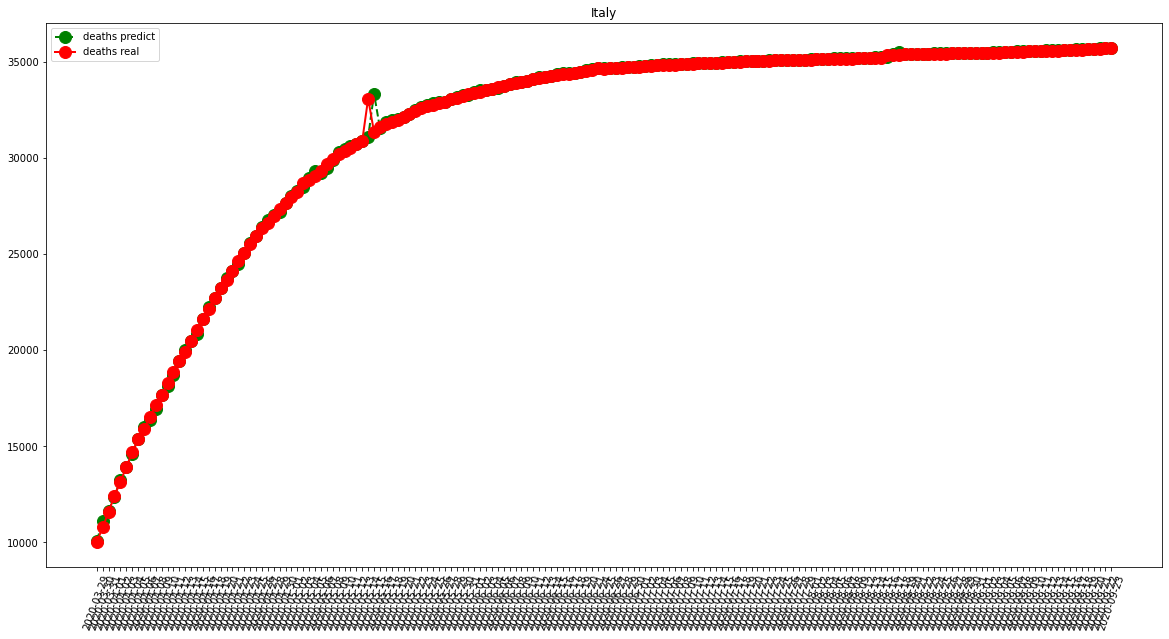

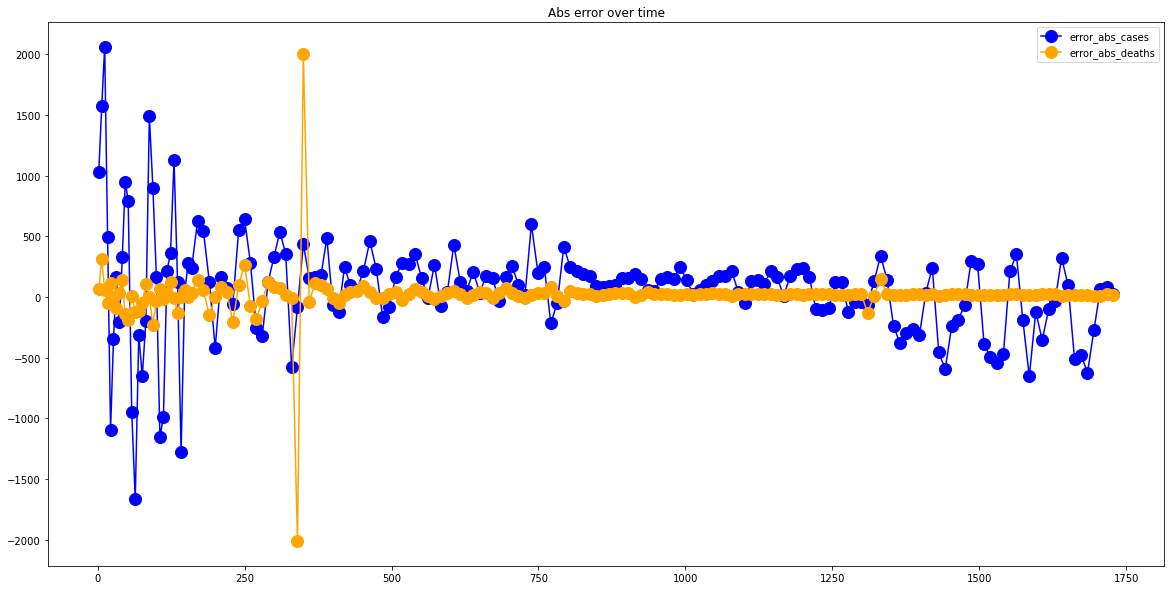

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2698.1666666666665
RMSE =  5303.371891498863
-- Spain performances for deaths --
MAE =  120.94252873563218
RMSE =  310.1550038880263


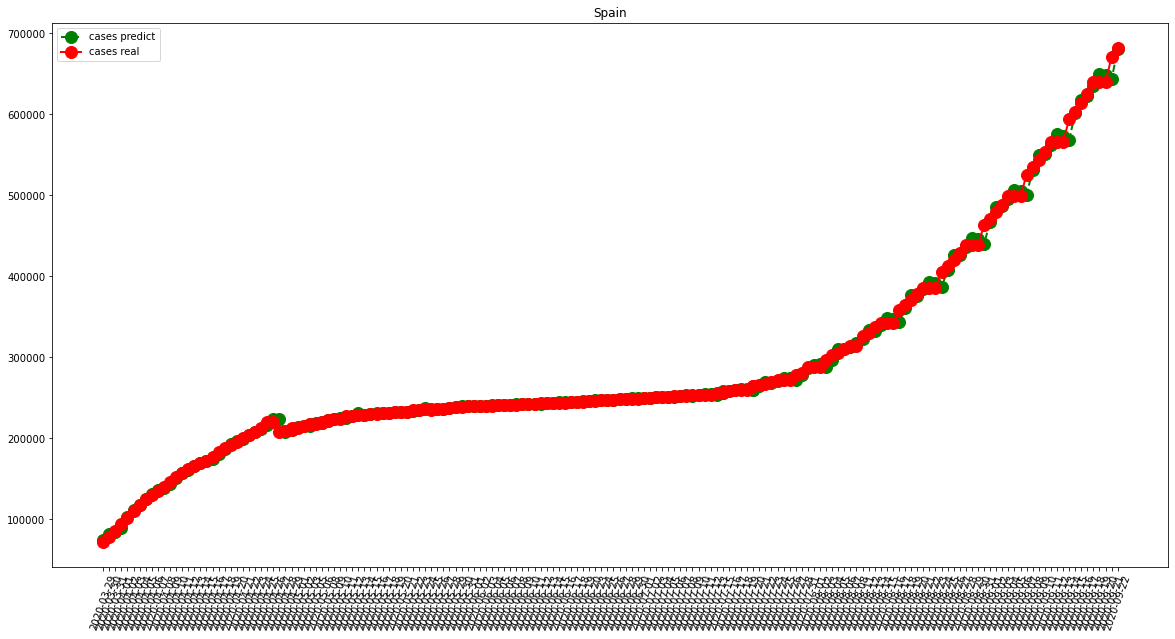

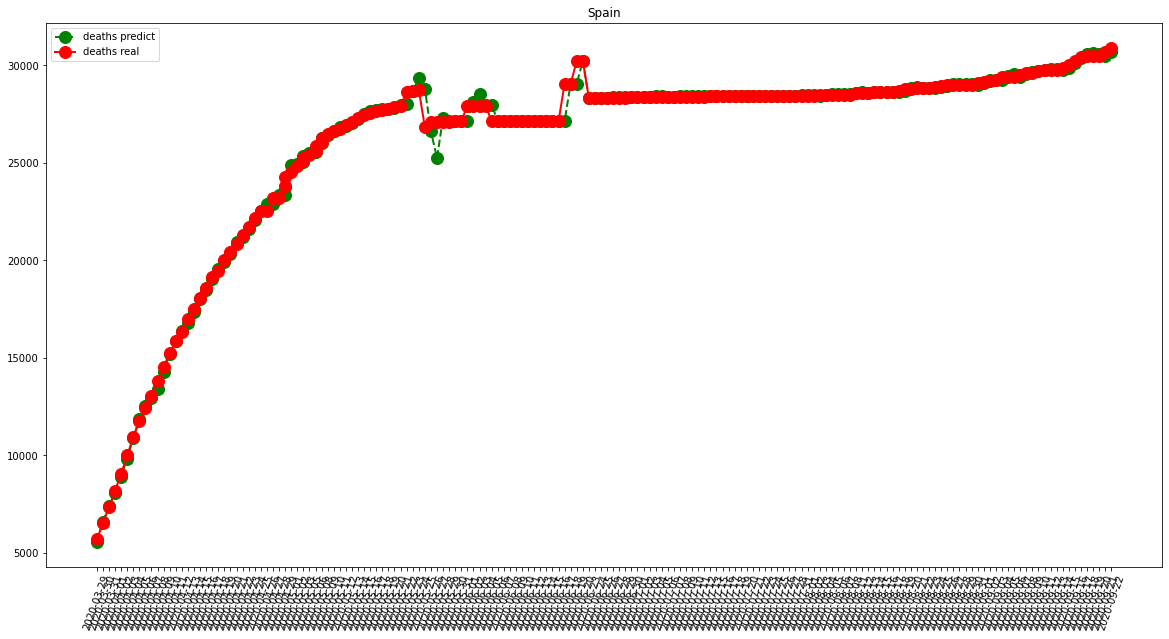

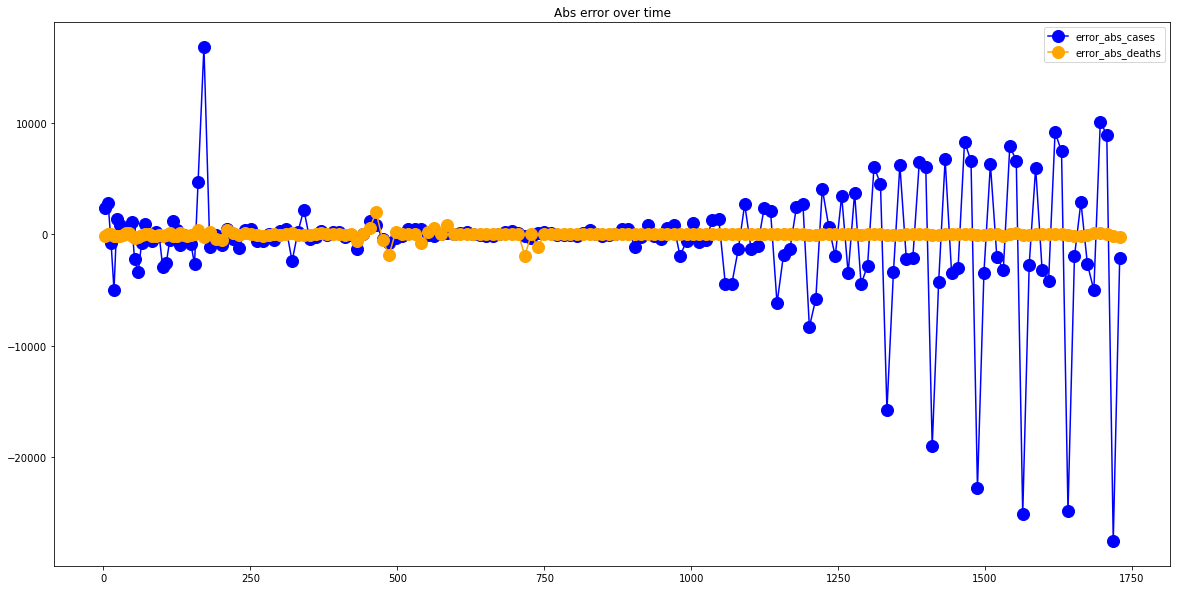

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15674.902298850575
RMSE =  23123.826083033724
-- United States performances for deaths --
MAE =  482.37931034482756
RMSE =  673.5584607144357


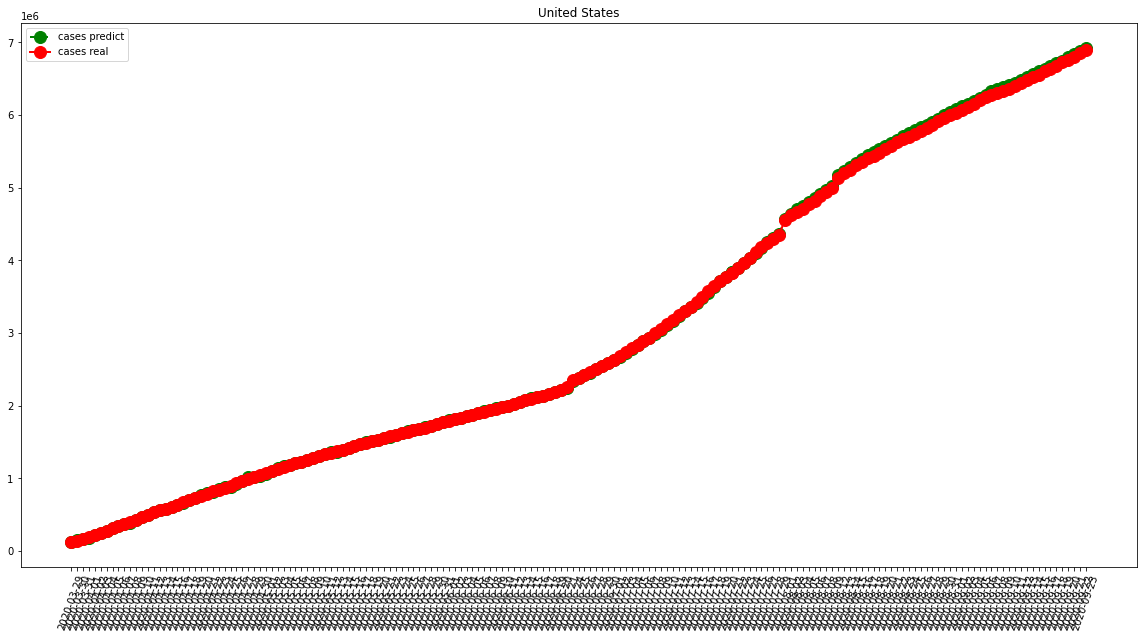

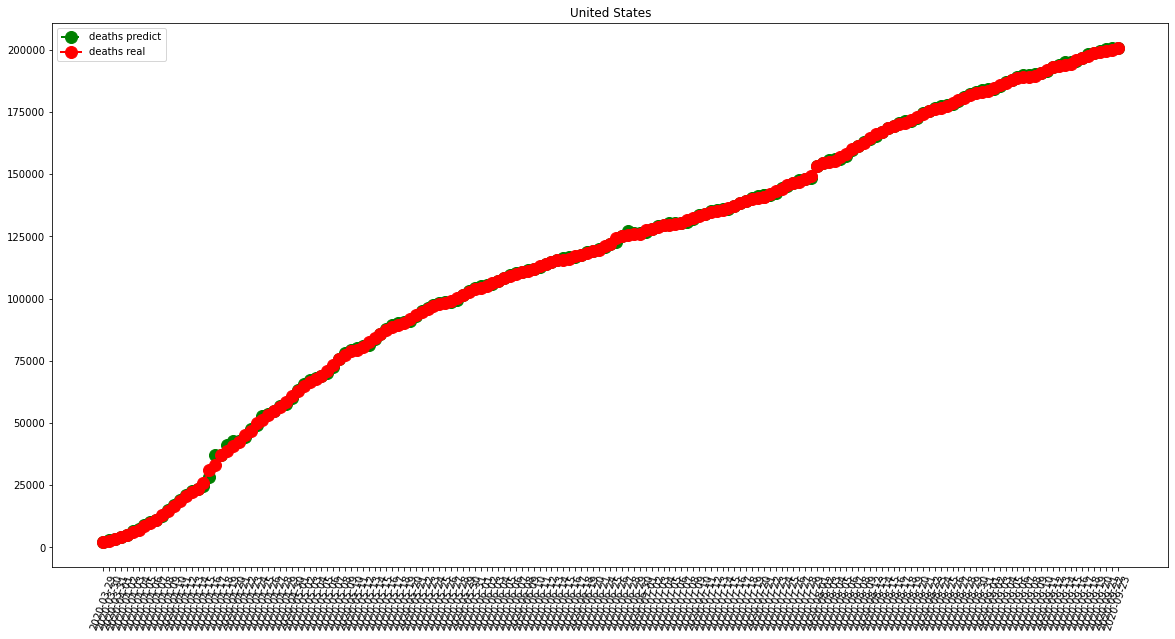

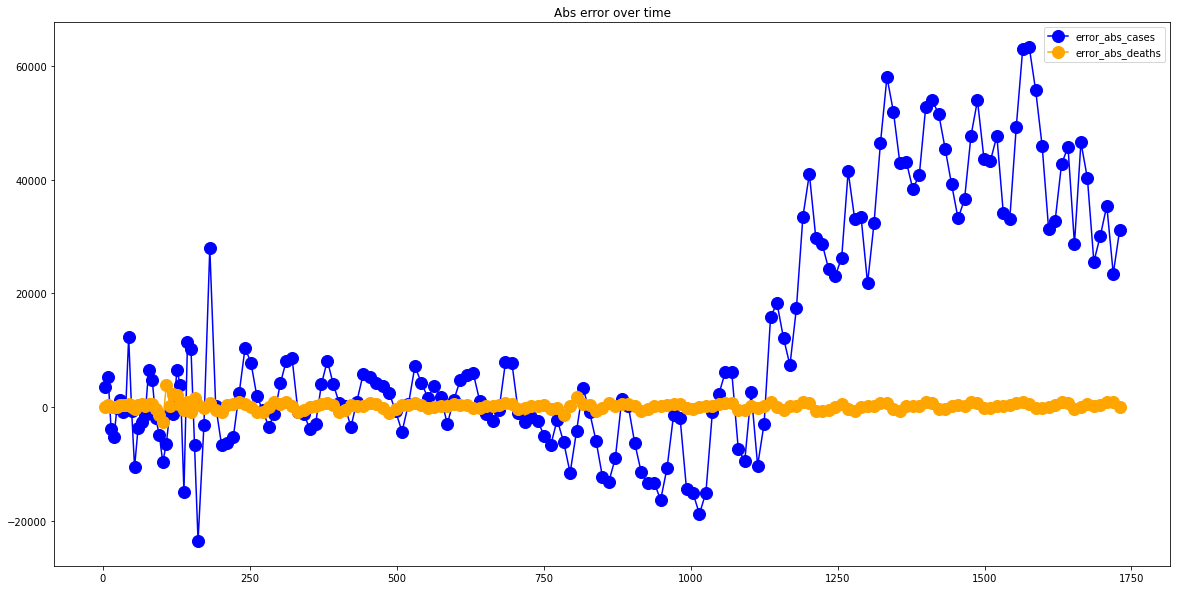

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  58.7183908045977
RMSE =  90.54512433162752
-- China performances for deaths --
MAE =  24.57471264367816
RMSE =  119.05272665562066


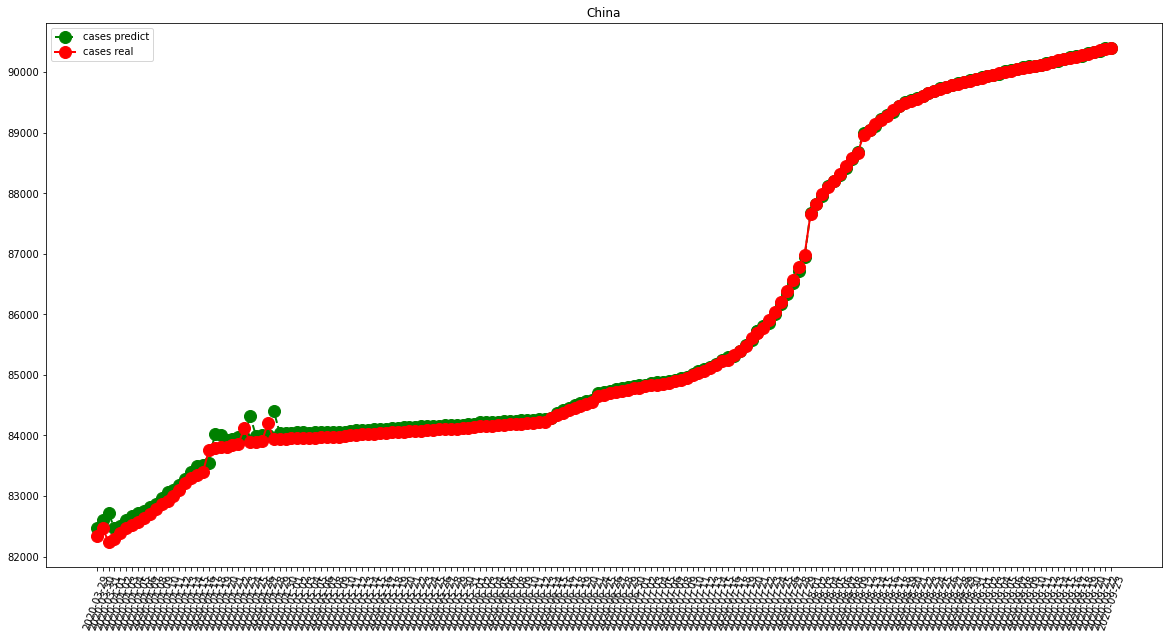

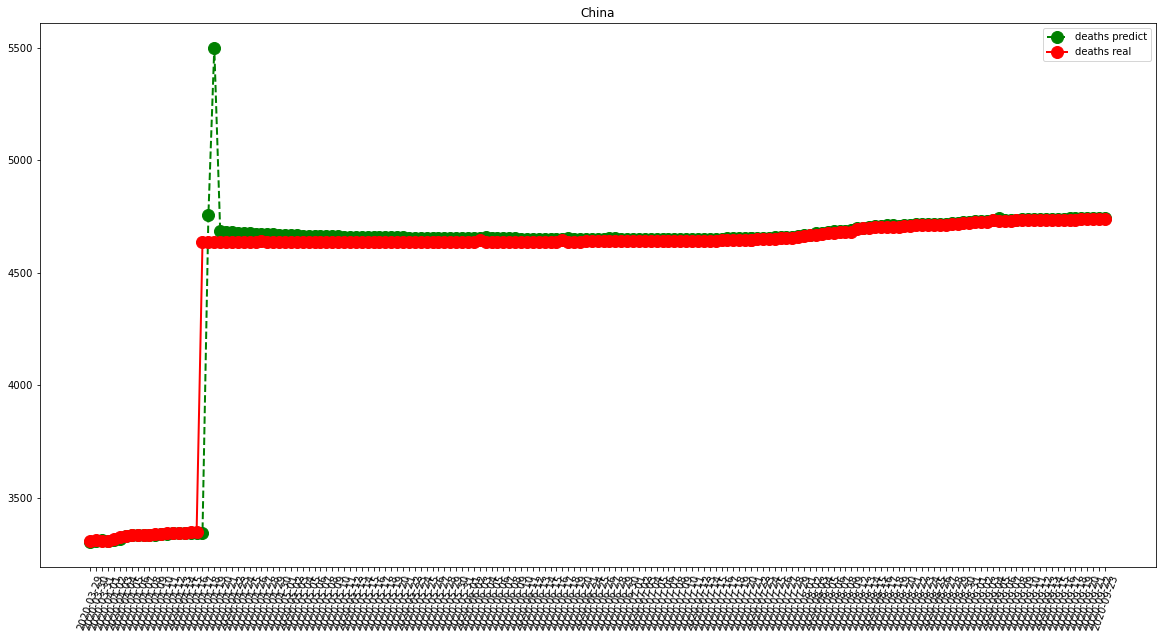

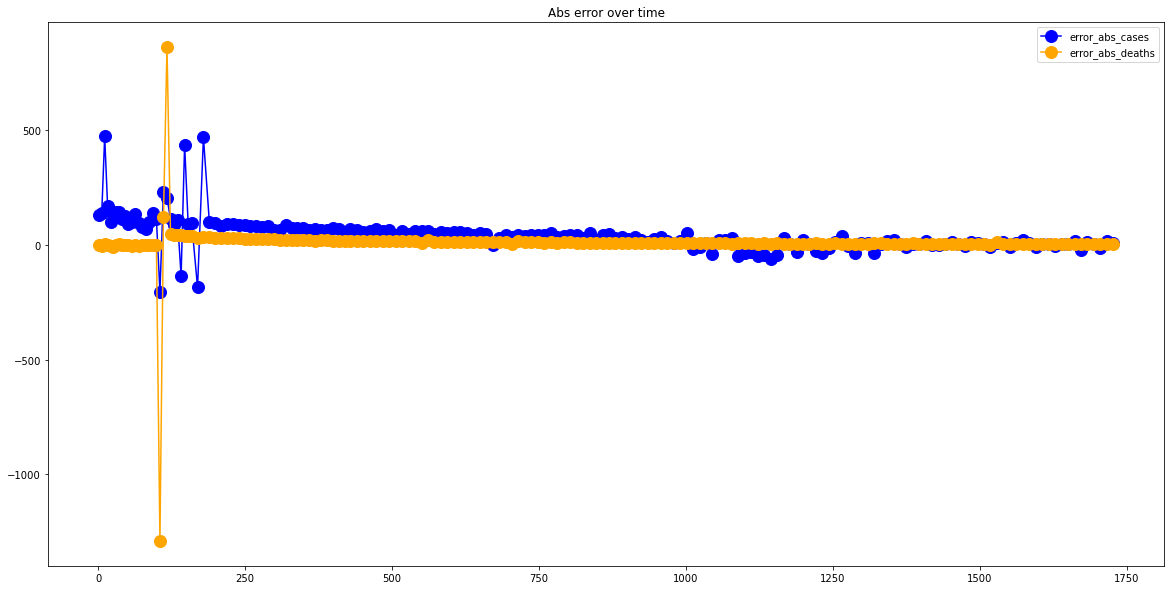

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1027.5068493150684
RMSE =  3483.772758108225
-- United Kingdom performances for deaths --
MAE =  211.4794520547945
RMSE =  706.3902545907764


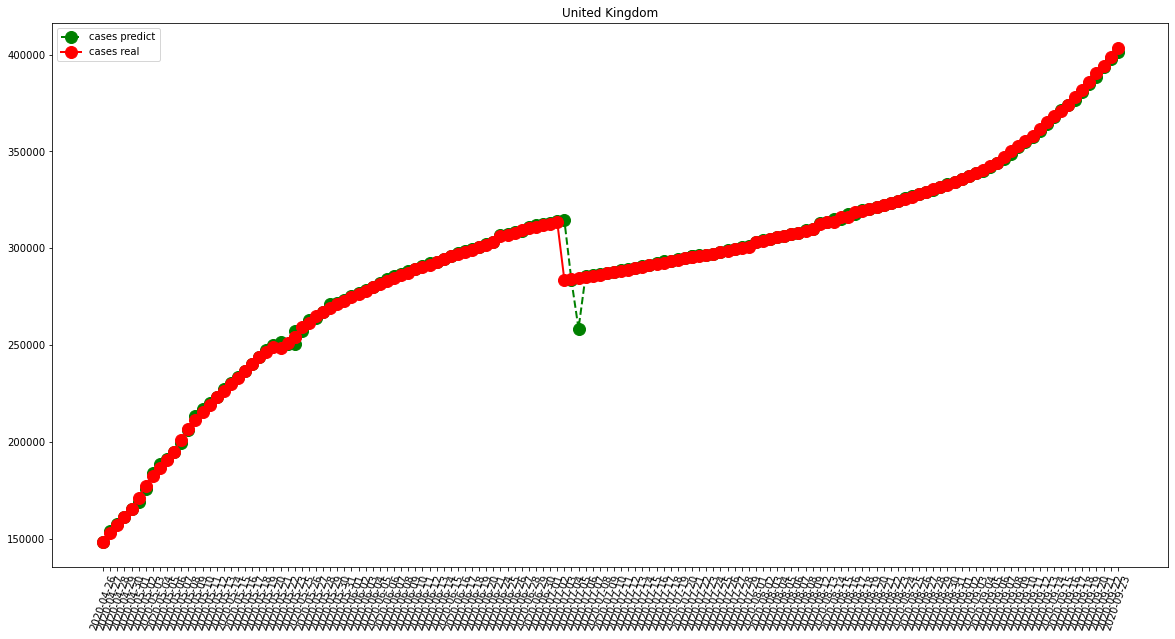

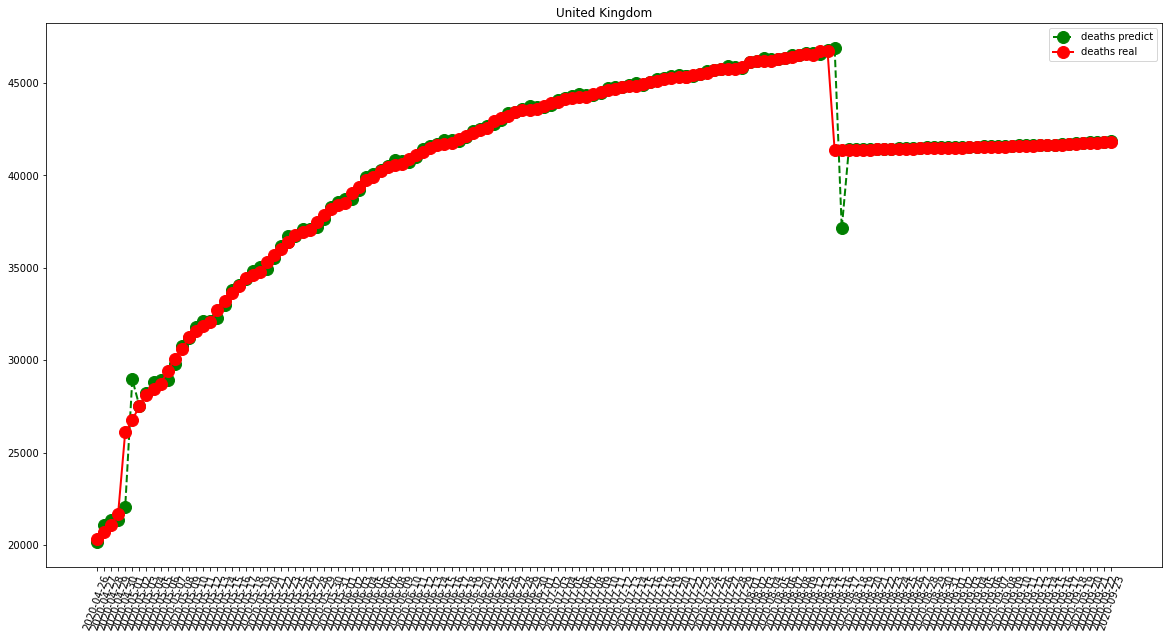

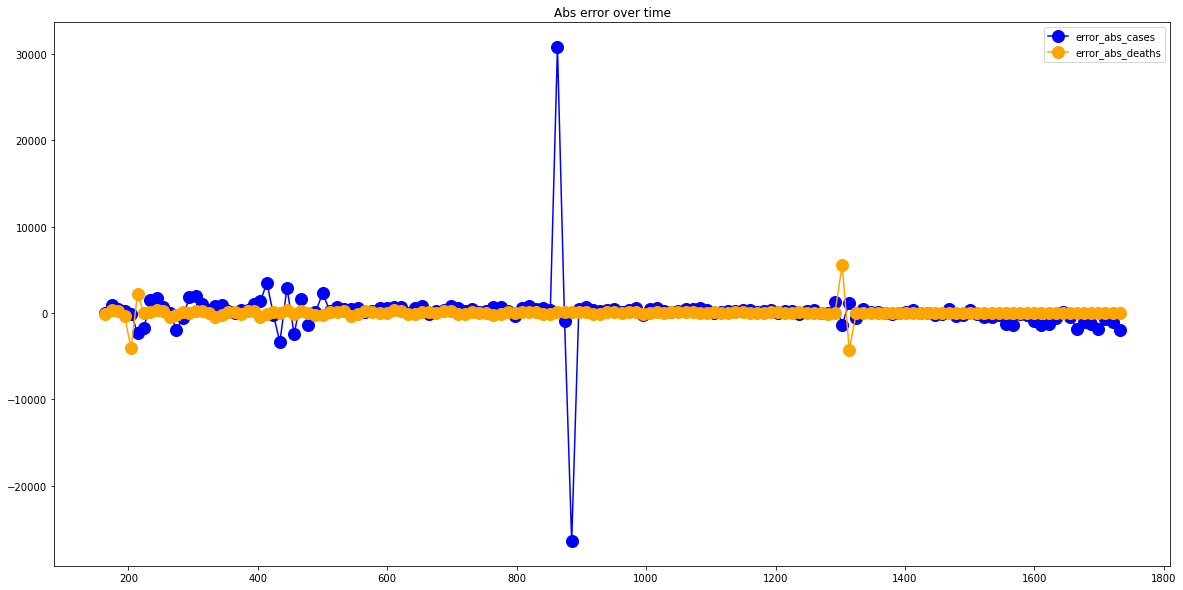

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  421.06849315068496
RMSE =  588.9499827589614
-- Germany performances for deaths --
MAE =  18.78767123287671
RMSE =  36.483905252395246


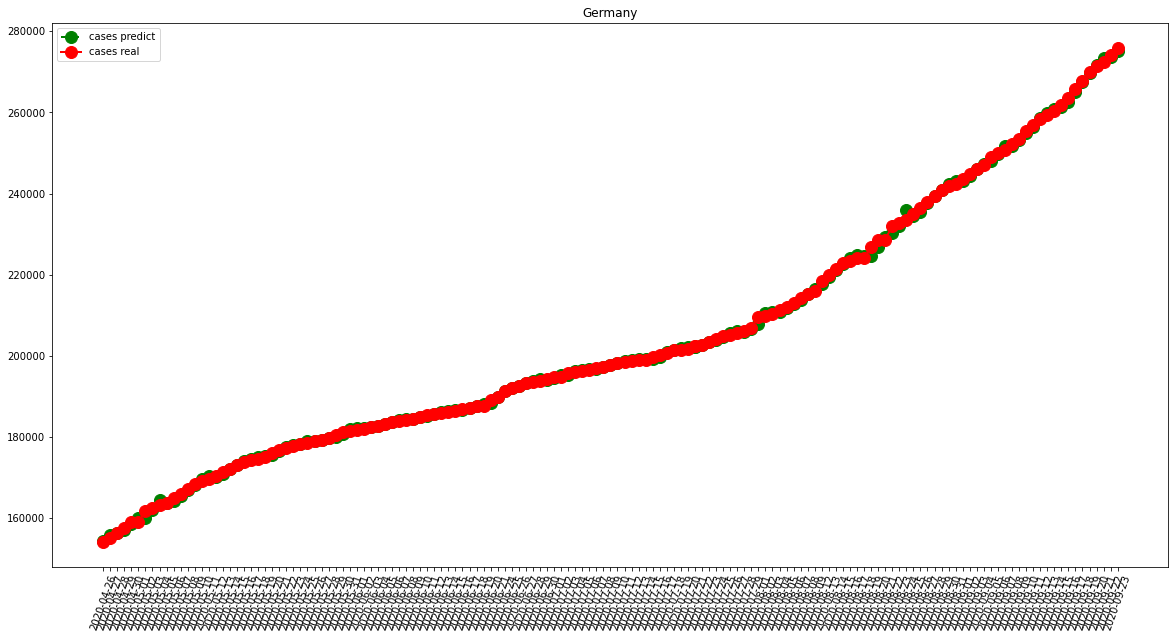

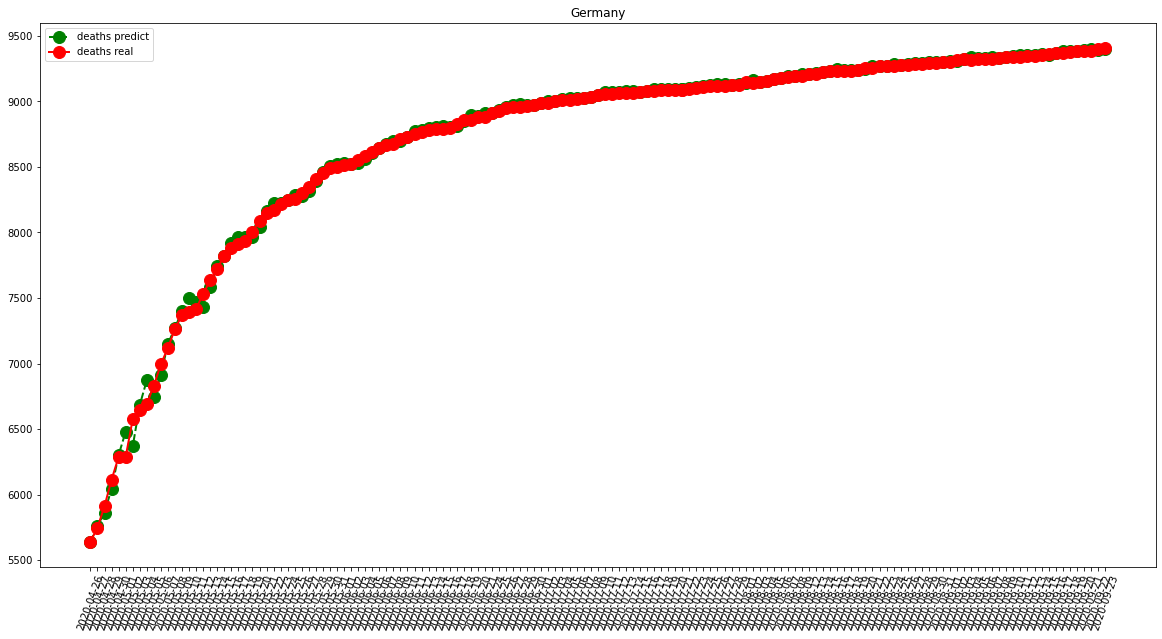

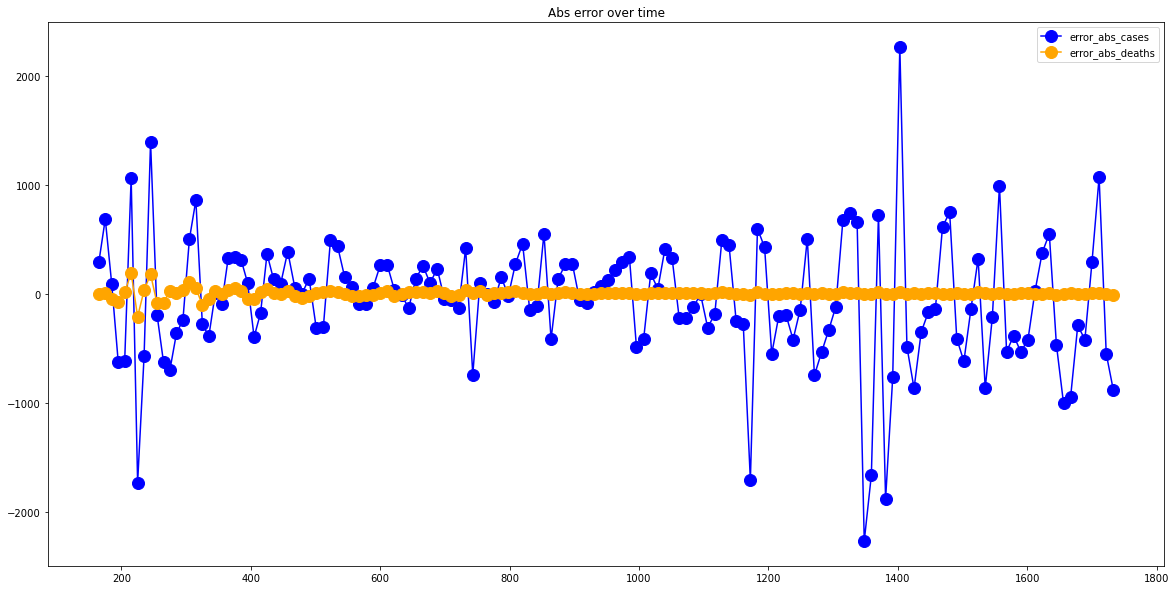

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  866.8835616438356
RMSE =  1222.4647486303381
-- Iran performances for deaths --
MAE =  51.60958904109589
RMSE =  84.87892263011658


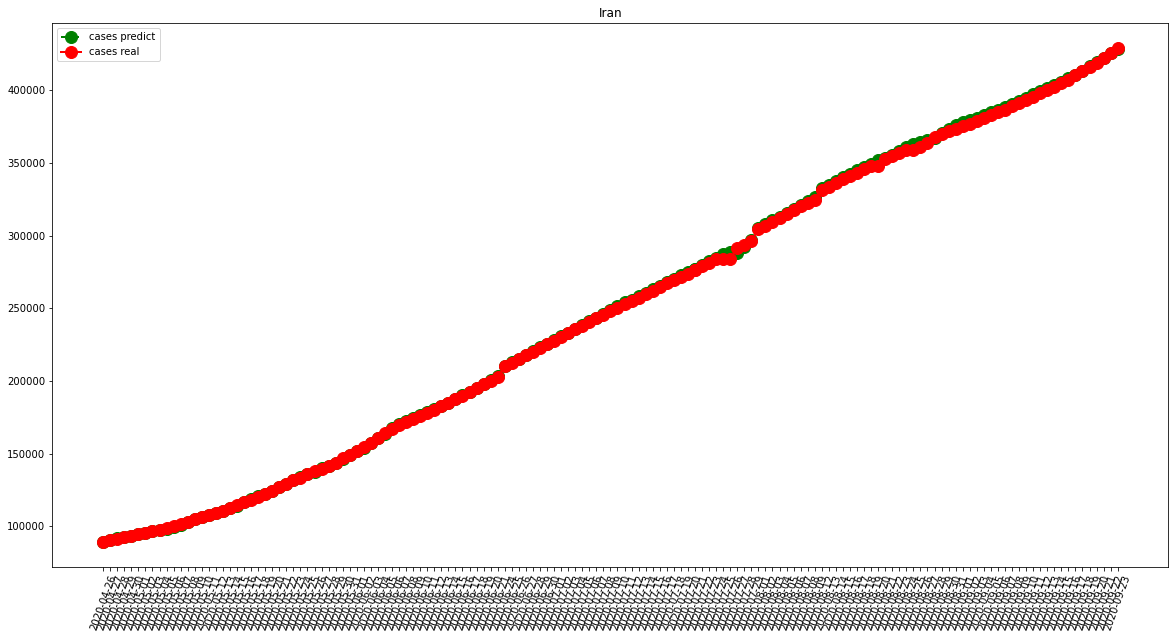

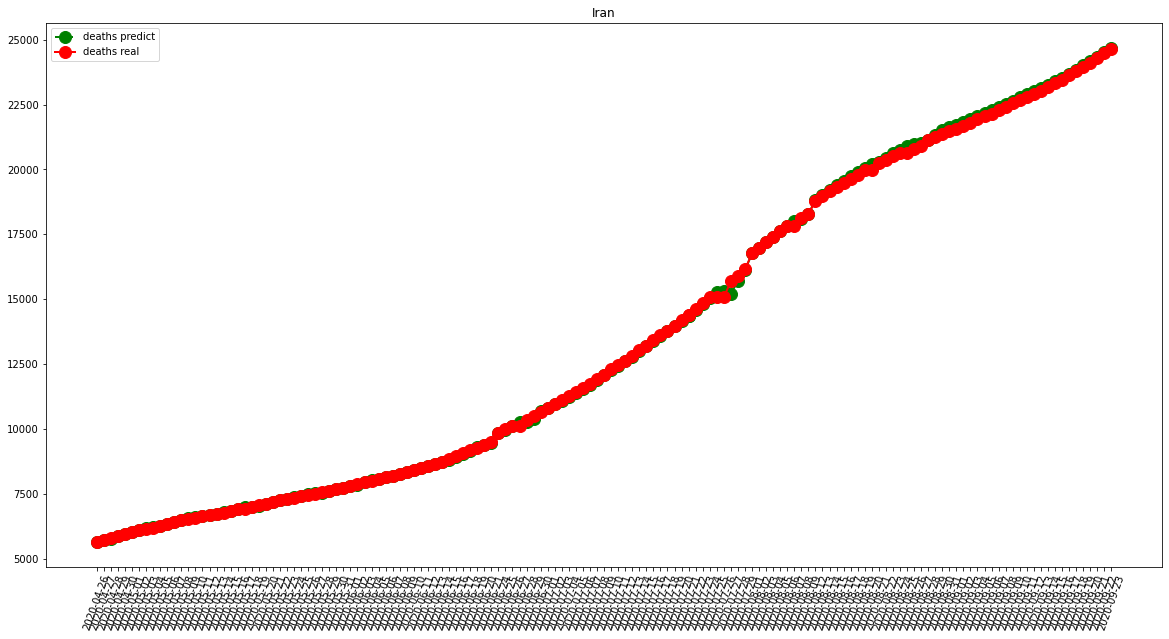

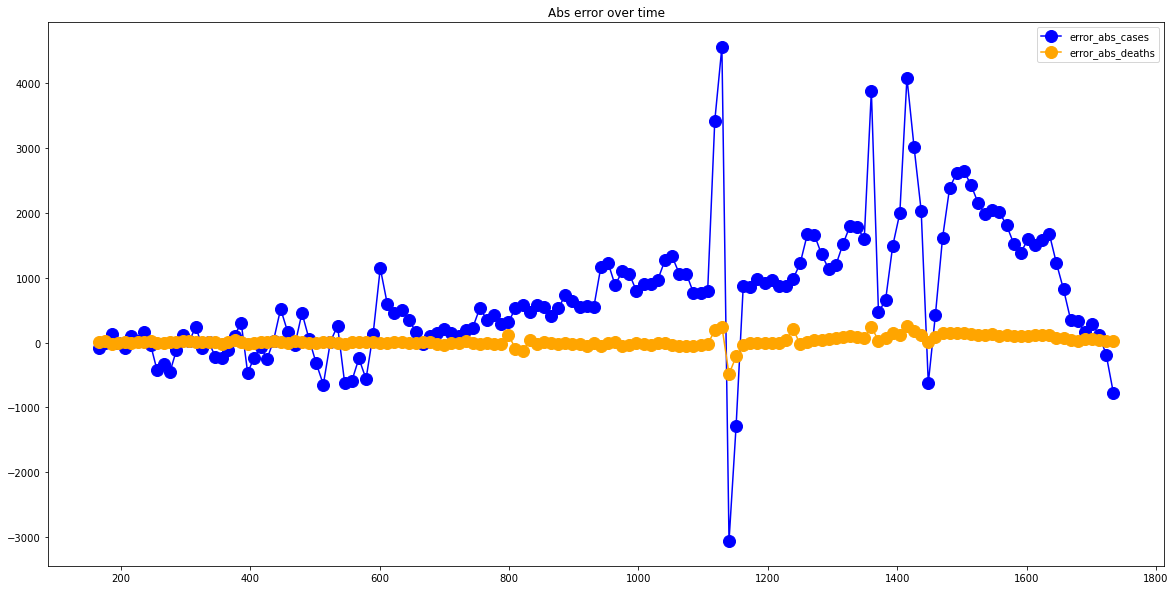

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  223.67123287671234
RMSE =  332.03614261101154
-- Turkey performances for deaths --
MAE =  15.86986301369863
RMSE =  84.24088910535235


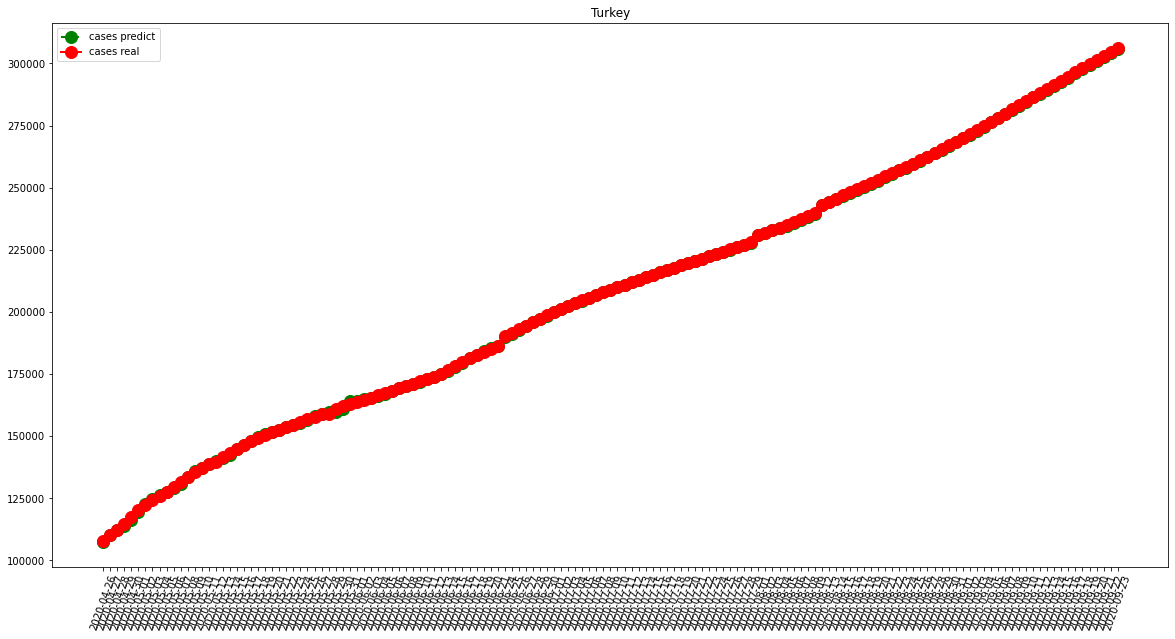

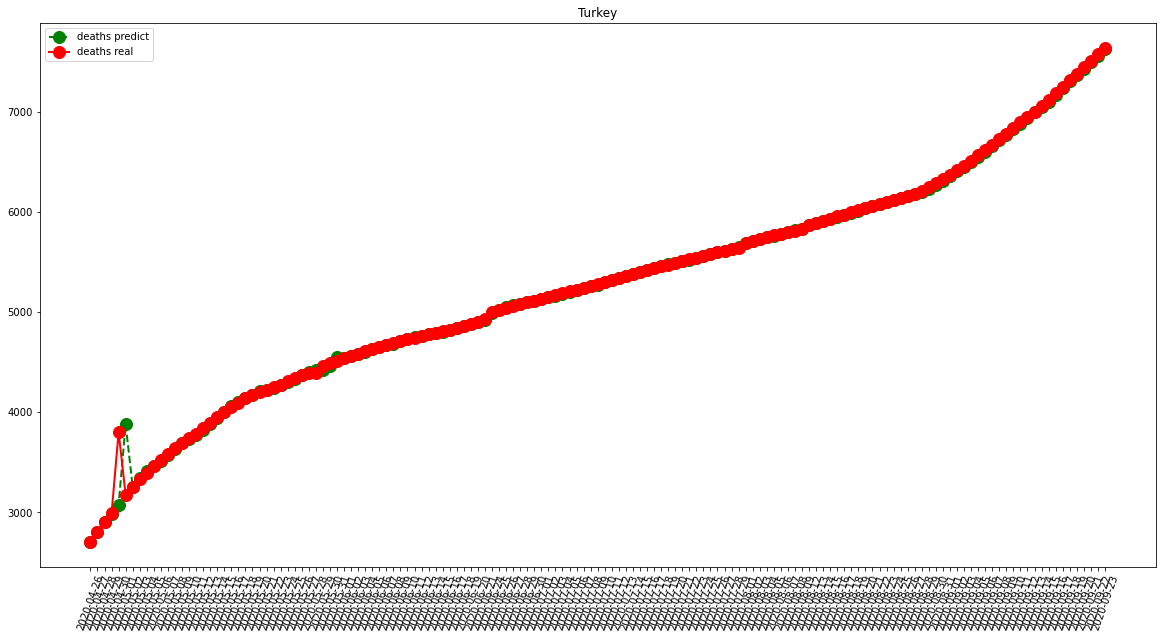

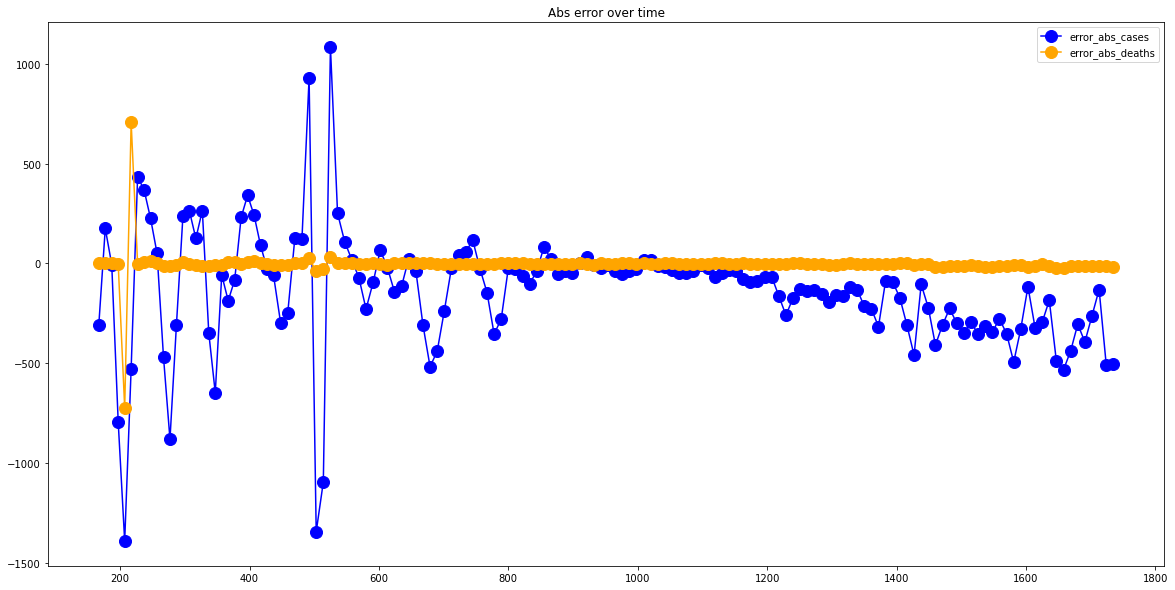

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16682.63025210084
RMSE =  21901.843522614156
-- Brazil performances for deaths --
MAE =  495.21008403361344
RMSE =  601.2524323401594


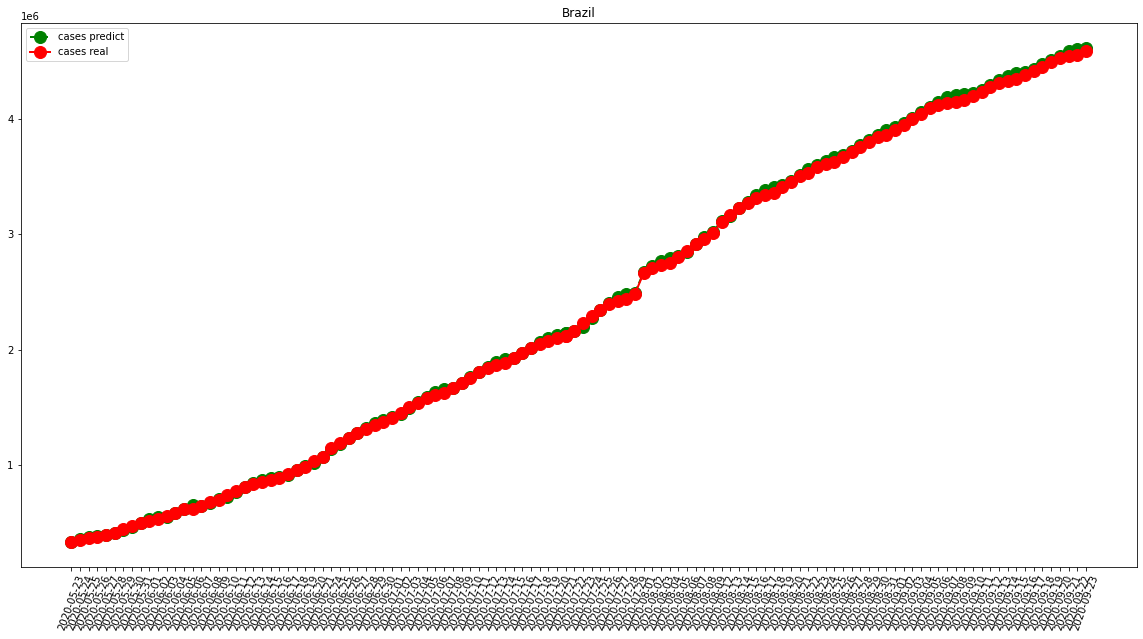

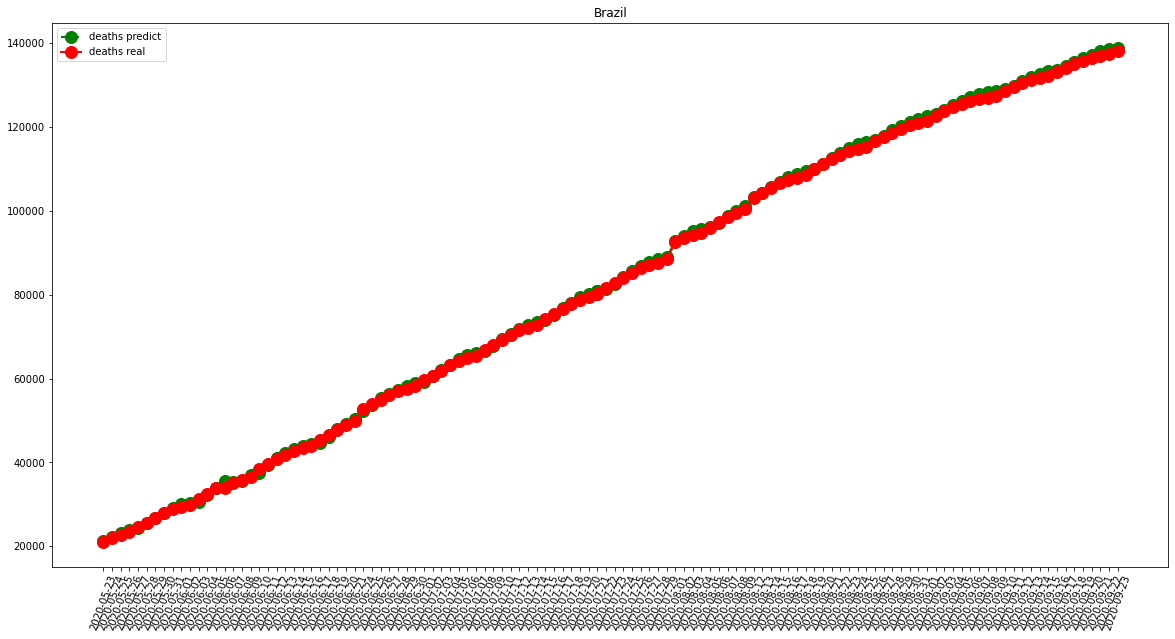

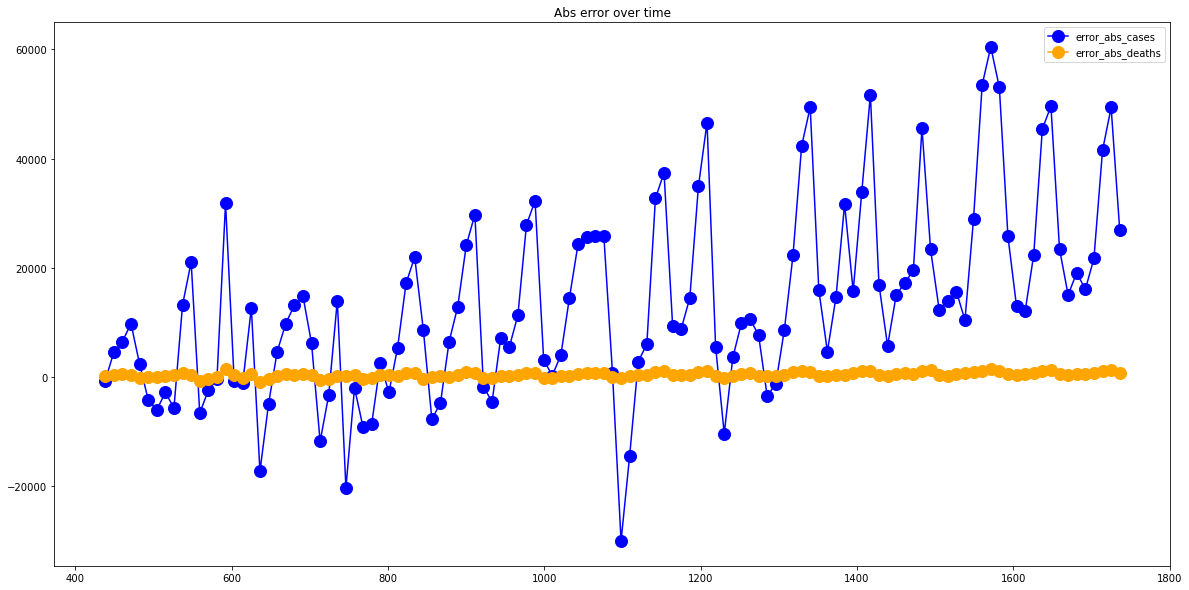

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)